<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-02-10 12:35:01--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  64.3MB/s    in 2.4s    

2025-02-10 12:35:05 (64.3 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [2]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 165.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 179.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 103.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 120.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 110.0 MB/s eta 0:00:00


In [14]:
!pip install seaborn

In [15]:
import seaborn as sns

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [3]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [4]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [5]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [6]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [7]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [9]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


In [20]:
# 定义 SQL 查询
QUERY = """
SELECT CompTotal
FROM main
"""

# 执行 SQL 查询并将结果存储在 DataFrame 中
df = pd.read_sql_query(QUERY, conn)

# 打印前几行数据以检查
print(df.head())

# 检查数据类型
print("Data types:\n", df.dtypes)

   CompTotal
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
Data types:
 CompTotal    float64
dtype: object


In [21]:
df.dropna(subset=['CompTotal'], inplace=True)

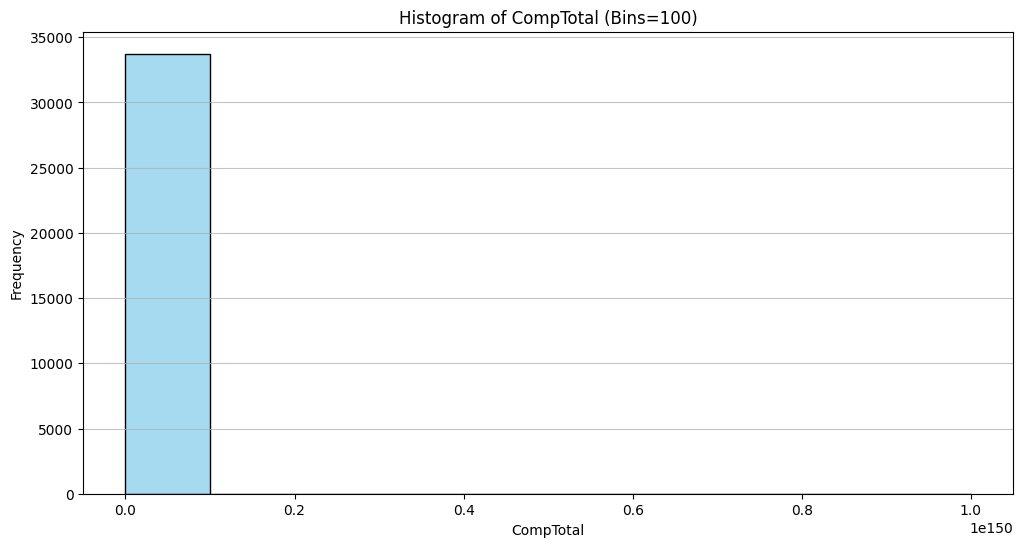

In [22]:
# 绘制 CompTotal 的直方图，调整 bins 数量
plt.figure(figsize=(12, 6))
sns.histplot(df['CompTotal'], bins=10, kde=False, color='skyblue', edgecolor='black')
plt.title('Histogram of CompTotal')
plt.xlabel('CompTotal')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

**Box Plots**

Plot a box plot of Age.


In [24]:
# 定义 SQL 查询
QUERY = """
SELECT Age
FROM main
"""

# 执行 SQL 查询并将结果存储在 DataFrame 中
df_one = pd.read_sql_query(QUERY, conn)

# 打印前几行数据以检查
print(df_one.head())

# 检查数据类型
print("Data types:\n", df_one.dtypes)

                  Age
0  Under 18 years old
1     35-44 years old
2     45-54 years old
3     18-24 years old
4     18-24 years old
Data types:
 Age    object
dtype: object


<Axes: ylabel='Age'>

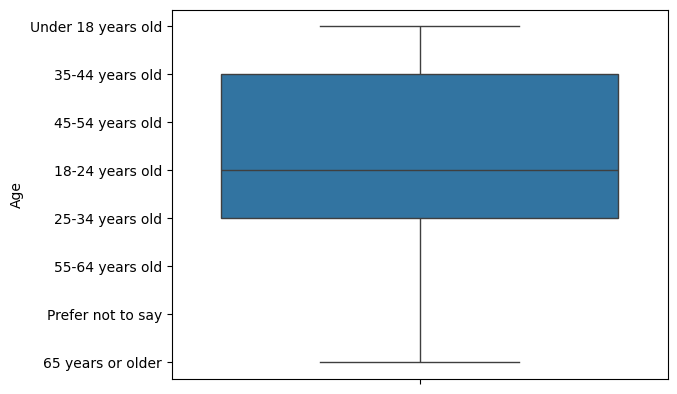

In [25]:
sns.boxplot(y="Age", data=df_one)

### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


In [26]:
# 定义 SQL 查询
QUERY = """
SELECT Age,WorkExp
FROM main
"""

# 执行 SQL 查询并将结果存储在 DataFrame 中
df_two = pd.read_sql_query(QUERY, conn)

# 打印前几行数据以检查
print(df_two.head())

# 检查数据类型
print("Data types:\n", df_two.dtypes)

                  Age  WorkExp
0  Under 18 years old      NaN
1     35-44 years old     17.0
2     45-54 years old      NaN
3     18-24 years old      NaN
4     18-24 years old      NaN
Data types:
 Age         object
WorkExp    float64
dtype: object


In [27]:
print(df_two['Age'].unique())

['Under 18 years old' '35-44 years old' '45-54 years old'
 '18-24 years old' '25-34 years old' '55-64 years old' 'Prefer not to say'
 '65 years or older']


In [28]:
# 定义年龄区间的映射字典
age_mapping = {
    'Under 18 years old': 13,   # 取中间值 17.5 向下取整
    '18-24 years old': 21,     # 取中间值 21
    '25-34 years old': 30,     # 取中间值 29.5 向下取整
    '35-44 years old': 40,     # 取中间值 39.5 向下取整
    '45-54 years old': 50,     # 取中间值 49.5 向下取整
    '55-64 years old': 60,     # 取中间值 59.5 向下取整
    '65 years or older': 70,   # 取中间值 67.5 向下取整
    'Prefer not to say': None  # 如果不想透露，则设置为 None 或其他合适的值
}

# 使用 map 方法进行映射
df_two['Age_Numeric'] = df_two['Age'].map(age_mapping)

# 打印前几行数据以检查
print("\nAfter mapping:")
print(df_two.head())

# 检查新的数值列的数据类型
print("\nData type of Age_Numeric:", df_two['Age_Numeric'].dtype)


After mapping:
                  Age  WorkExp  Age_Numeric
0  Under 18 years old      NaN         13.0
1     35-44 years old     17.0         40.0
2     45-54 years old      NaN         50.0
3     18-24 years old      NaN         21.0
4     18-24 years old      NaN         21.0

Data type of Age_Numeric: float64


<Axes: xlabel='WorkExp', ylabel='Age_Numeric'>

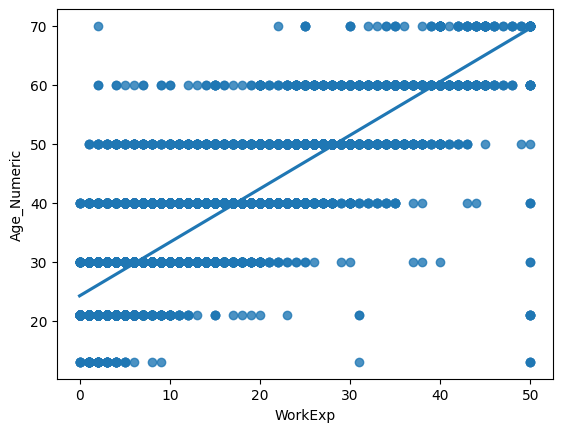

In [29]:
sns.regplot(x="WorkExp", y="Age_Numeric", data=df_two)

In [30]:
df_two[["WorkExp", "Age_Numeric"]].corr()

,WorkExp,Age_Numeric
WorkExp,1.00000,0.84803
Age_Numeric,0.84803,1.00000


**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


In [31]:
# 定义 SQL 查询
QUERY = """
SELECT Age,TimeSearching,Frustration
FROM main
"""

# 执行 SQL 查询并将结果存储在 DataFrame 中
df_three = pd.read_sql_query(QUERY, conn)

# 打印前几行数据以检查
print(df_three.head())

# 检查数据类型
print("Data types:\n", df_three.dtypes)

                  Age TimeSearching Frustration
0  Under 18 years old          None        None
1     35-44 years old          None        None
2     45-54 years old          None        None
3     18-24 years old          None        None
4     18-24 years old          None        None
Data types:
 Age              object
TimeSearching    object
Frustration      object
dtype: object


In [32]:
# 使用 map 方法进行映射
df_three['Age_Numeric'] = df_three['Age'].map(age_mapping)

# 打印前几行数据以检查
print("\nAfter mapping:")
print(df_three.head())

# 检查新的数值列的数据类型
print("\nData type of Age_Numeric:", df_three['Age_Numeric'].dtype)


After mapping:
                  Age TimeSearching Frustration  Age_Numeric
0  Under 18 years old          None        None         13.0
1     35-44 years old          None        None         40.0
2     45-54 years old          None        None         50.0
3     18-24 years old          None        None         21.0
4     18-24 years old          None        None         21.0

Data type of Age_Numeric: float64


In [42]:
# 处理 None 值
# 选项 1: 删除包含 None 值的行
df_three.dropna(subset=['Age_Numeric'], inplace=True)
df_three.dropna(subset=['TimeSearching'], inplace=True)
df_three.dropna(subset=['Frustration'], inplace=True)

# 计算 s 参数
norm_Age_Numeric = (df_three['Age_Numeric'] - df_three['Age_Numeric'].min()) / (df_three['Age_Numeric'].max() - df_three['Age_Numeric'].min())
s = norm_Age_Numeric * 2000 + 10

Text(0.5, 1.0, 'A bubble plot of TimeSearching and Frustratio')

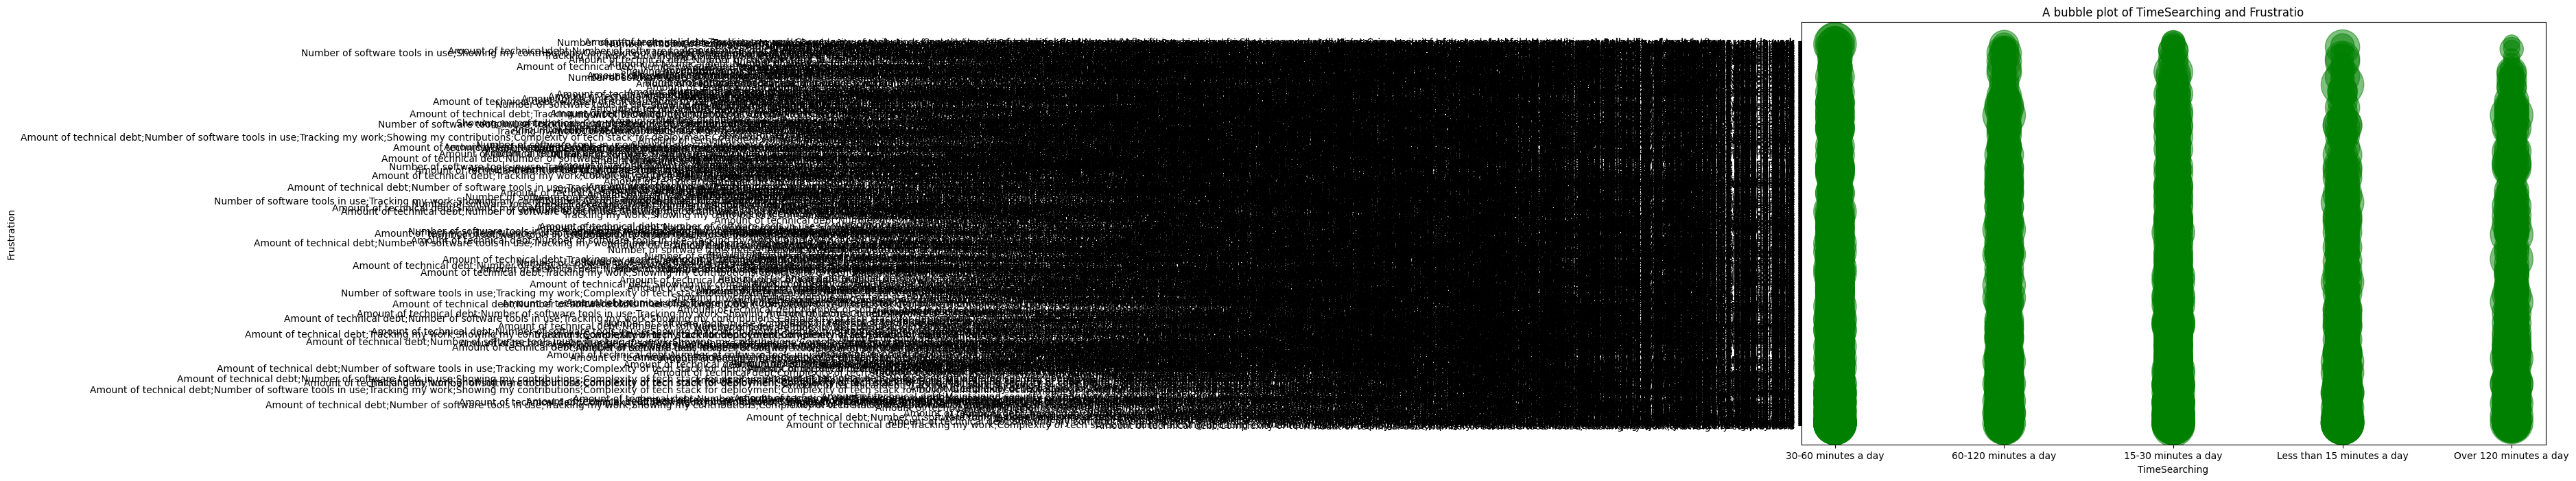

In [43]:
ax0 = df_three.plot(kind='scatter',
                    x='TimeSearching',
                    y='Frustration',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_Age_Numeric * 2000 + 10,  # pass in weights 
                    )

ax0.set_ylabel('Frustration')
ax0.set_title('A bubble plot of TimeSearching and Frustratio')

### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


In [47]:
## Write your code here
QUERY = """
SELECT DatabaseWantToWorkWith, COUNT(*) as count
FROM main
GROUP BY DatabaseWantToWorkWith
ORDER BY count DESC
LIMIT 1,5
"""
df_four = pd.read_sql_query(QUERY, conn)
print(df_four)

  DatabaseWantToWorkWith  count
0             PostgreSQL   3738
1      PostgreSQL;SQLite   1533
2                 SQLite   1476
3   Microsoft SQL Server   1431
4                  MySQL   1139


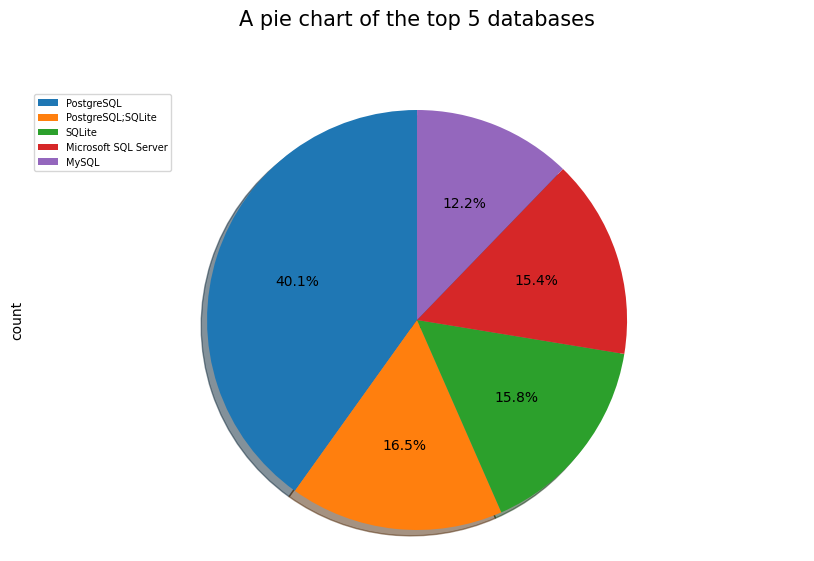

In [48]:
df_four['count'].plot(kind='pie',
                            figsize=(10, 6),
                            autopct='%1.1f%%', #会在每个饼图部分显示其占比，精确到小数点后一位并以百分比的形式表示。
                            startangle=90,#表示饼图从 90 度的位置开始绘制。    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            )

# scale the title up by 12% to match pctdistance
plt.title('A pie chart of the top 5 databases', y=1.12, fontsize = 15) 
plt.axis('equal') #使饼图的纵横比相等，确保饼图是圆形而不是椭圆形，以保证比例的准确性。
plt.legend(labels=df_four['DatabaseWantToWorkWith'], loc='upper left', fontsize=7) 

plt.show()

**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


In [51]:
# 定义 SQL 查询
QUERY = """
SELECT Age,TimeSearching,TimeAnswering
FROM main
WHERE Age = '35-44 years old'
AND TimeSearching IS NOT NULL
AND TimeAnswering IS NOT NULL
"""

# 执行 SQL 查询并将结果存储在 DataFrame 中
df_five = pd.read_sql_query(QUERY, conn)

# 打印前几行数据以检查
print(df_five.head())

# 检查数据类型
print("Data types:\n", df_five.dtypes)

               Age         TimeSearching               TimeAnswering
0  35-44 years old   30-60 minutes a day        60-120 minutes a day
1  35-44 years old   30-60 minutes a day         15-30 minutes a day
2  35-44 years old   15-30 minutes a day  Less than 15 minutes a day
3  35-44 years old   30-60 minutes a day         30-60 minutes a day
4  35-44 years old  60-120 minutes a day        60-120 minutes a day
Data types:
 Age              object
TimeSearching    object
TimeAnswering    object
dtype: object


In [52]:
print(df_five['TimeSearching'].unique())

['30-60 minutes a day' '15-30 minutes a day' '60-120 minutes a day'
 'Less than 15 minutes a day' 'Over 120 minutes a day']



After mapping:
               Age         TimeSearching               TimeAnswering  \
0  35-44 years old   30-60 minutes a day        60-120 minutes a day   
1  35-44 years old   30-60 minutes a day         15-30 minutes a day   
2  35-44 years old   15-30 minutes a day  Less than 15 minutes a day   
3  35-44 years old   30-60 minutes a day         30-60 minutes a day   
4  35-44 years old  60-120 minutes a day        60-120 minutes a day   

   TimeSearching_Numeric  TimeAnswering_Numeric  
0                   45.0                   90.0  
1                   45.0                   22.5  
2                   22.5                    7.5  
3                   45.0                   45.0  
4                   90.0                   90.0  

Data types:
 Age                       object
TimeSearching             object
TimeAnswering             object
TimeSearching_Numeric    float64
TimeAnswering_Numeric    float64
dtype: object


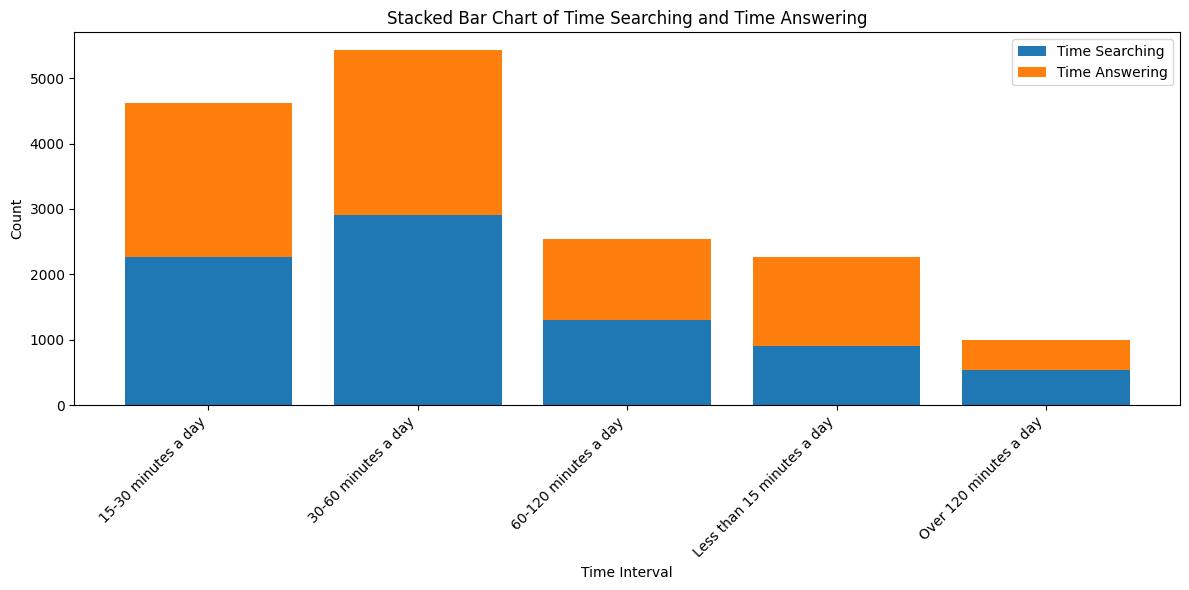

In [54]:
# 定义时间区间的映射字典
time_mapping = {
    'Less than 15 minutes a day': 7.5,       # 取中间值 7.5 分钟
    '15-30 minutes a day': 22.5,             # 取中间值 22.5 分钟
    '30-60 minutes a day': 45,               # 取中间值 45 分钟
    '60-120 minutes a day': 90,              # 取中间值 90 分钟
    'More than 120 minutes a day': 180         # 取中间值 180 分钟
}

# 使用 map 方法进行映射
df_five['TimeSearching_Numeric'] = df_five['TimeSearching'].map(time_mapping)
df_five['TimeAnswering_Numeric'] = df_five['TimeAnswering'].map(time_mapping)

# 打印前几行数据以检查
print("\nAfter mapping:")
print(df_five.head())

# 检查新的数值列的数据类型
print("\nData types:\n", df_five.dtypes)

# 聚合数据
time_searching_counts = df_five['TimeSearching'].value_counts().sort_index()
time_answering_counts = df_five['TimeAnswering'].value_counts().sort_index()

# 确保两个 Series 具有相同的索引
time_intervals = time_searching_counts.index.union(time_answering_counts.index)
time_searching_counts = time_searching_counts.reindex(time_intervals, fill_value=0)
time_answering_counts = time_answering_counts.reindex(time_intervals, fill_value=0)

# 创建堆积条形图
plt.figure(figsize=(12, 6))
bar_width = 0.8
index = range(len(time_intervals))

plt.bar(index, time_searching_counts, bar_width, label='Time Searching')
plt.bar(index, time_answering_counts, bar_width, bottom=time_searching_counts, label='Time Answering')

plt.xlabel('Time Interval')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Time Searching and Time Answering')
plt.xticks(index, time_intervals, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


In [ ]:
## Write your code here

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


In [ ]:
## Write your code here

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [ ]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
